In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [10]:
# Creating Dataset:
x,y = make_classification(n_samples=200,n_features=8,n_classes=2,random_state=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
sc.fit(xtest)
xtest = sc.transform(xtest)
x.shape

(200, 8)

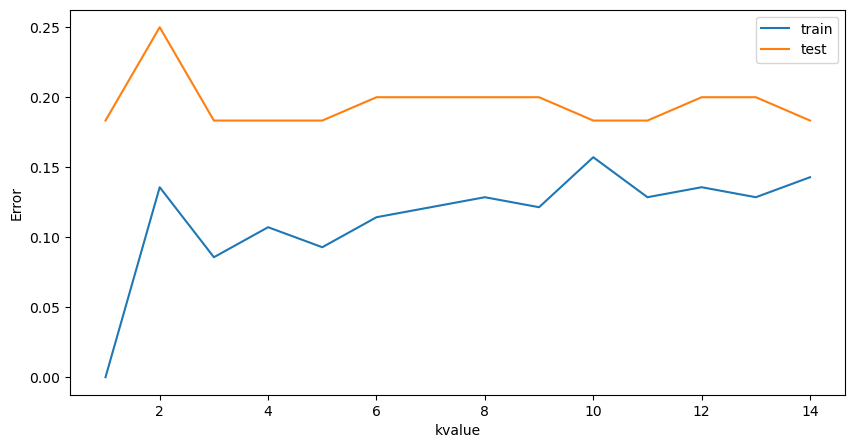

In [11]:
error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred1 = knn.predict(xtrain)
    error1.append(np.mean(ytrain!=ypred1))
    ypred2 = knn.predict(xtest)
    error2.append(np.mean(ytest!=ypred2))

plt.figure(figsize=(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel("kvalue")
plt.ylabel("Error")
plt.legend()
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)

In [21]:
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[23 10]
 [ 1 26]]
               precision    recall  f1-score   support

           0       0.96      0.70      0.81        33
           1       0.72      0.96      0.83        27

    accuracy                           0.82        60
   macro avg       0.84      0.83      0.82        60
weighted avg       0.85      0.82      0.82        60

 Accuracy0.8166666666666667
